# Table of contents
0. [Introduction](0-Introduction.ipynb)
1. [Variables](1-Variables.ipynb)
2. [Data structures](2-Data-Structures.ipynb)
3. [Conditional statements and loops](3-Conditional-Statements-Loops.ipynb)
4. [Some exercises](4-Some-Exercises.ipynb)
5. [Introduction to functions](5-0-Introduction-function.ipynb) $\leftarrow$
    1. [File manipulation](5-1-File-manipulation.ipynb)
6. [From 0D to 1D](6-1-From-0D-to-1D.ipynb)
    1. [Adding lateral diffusion](6-2-Adding-lateral-diffusion.ipynb)
7. [From 1D to 2D](7-From-1D-to-2D.ipynb)
8. [Playing with the model](8-Playing-with-the-model.ipynb)

## 5. Introduction to functions
---
You have seen some functions previously, for example the functions `print`, `eval`, `input` or `range` for example which are `builtin` functions, functions that are "in" Python. You've also seen the functions `answer`, `hint`, `da_alone`, `da` or `di` which are function that have been imported (here via the commands `from Resources.UsefulFunctions import *` and `from Resources.Answers import answer, hint`)

A function is a piece of code that can be called at any time once defined. Functions are especially useful as you may have noticed, when you know that you will want to call a piece of code multiple times, maybe with different inputs. For example, you called the function `print` with many different inputs.

Functions are extremely powerful and can be manipulated in an extremely precise way. You can find all about that [there](https://docs.python.org/3/tutorial/controlflow.html#defining-functions).

That being said, the main idea is that a function can be defined the following way:
```python
def fib(n):
    """
    This function returns the highest fibonacci
    number which is lower than n.
    
    Args:
        n (int): upper boundary for the fibonacci number
    
    Returns:
        (int): higher fibo number lower than n
    """
    a, b = 0, 1
    while b < n:
        a, b = b, a+b
    return a
```
As explained, this function has to do with Fibonacci numbers (they are pretty cool, you can find out more [here](https://en.wikipedia.org/wiki/Fibonacci_number)).

The first line:
```python
def fib(n):
```
is the name of the function (`fib`) followed by the sequence of arguments of the function (here there is only one: `n`).

The following lines:
```python
    """
    This function returns the highest fibonacci
    number which is lower than n.
    
    Args:
        n (int): upper boundary for the fibonacci number
    
    Returns:
        (int): higher fibo number lower than n
    """
```
are the description of the function.

Then, there is the code of the function:
```python
    a, b = 0, 1
    while b < n:
        a, b = b, a+b
```

And finally the last last line:
```python
    return a
```
which informs the program what the function will return.

You can run the code below to define the function and to test it:

In [1]:
try:
    from centuri_course.utils import plot_concentration_1cell, da, di
    from centuri_course import answer, hint
except ImportError:
    %pip install centuri_course
    from centuri_course.utils import plot_concentration_1cell, da, di
    from centuri_course import answer, hint

In [4]:
def fib(n):
    """
    This function returns the highest fibonacci
    number which is lower than n.

    Args:
        n (int): upper boundary for the fibonacci number

    Returns:
        (int): higher fibo number lower than n
    """
    a, b = 0, 1
    while b < n:
        a, b = b, a + b
    return a


print(fib(2000))
?fib

1597


Signature: fib(n)
Docstring:
This function returns the highest fibonacci
number which is lower than n.

Args:
    n (int): upper boundary for the fibonacci number

Returns:
    (int): higher fibo number lower than n
File:      /var/folders/78/4tskqbhd46jg4r1qcv_tqs9c0000gn/T/ipykernel_10873/2652753797.py
Type:      function

### Exercise 6
Write a function that returns the lists of concentrations `A` and `I` given the parameters `dt`, `k`, `tau` and `n` and the initial concentrations `a` and `i`.

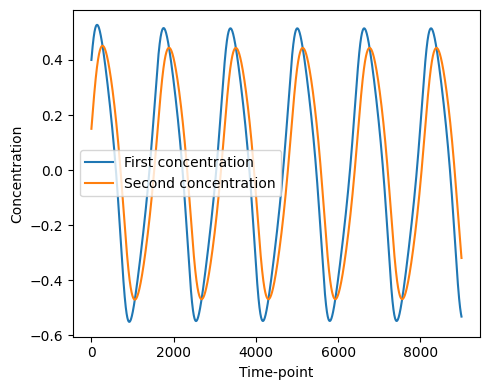

In [18]:
def compute_AI(a, i, dt, k, tau, n):  # Don't forget to add arguments
    A, I = [a], [i]
    for t in range(n):
        A.append(A[t] + da(A[t], I[t], dt, k))
        I.append(I[t] + di(I[t], A[t], dt, tau))
    return A, I

tau = 0.1
k = -0.005
T = 9.0
dt = 0.001
n = int(T / dt)
A, I = compute_AI(0.4, 0.15, 0.01, k, 1.3, n)
plot_concentration_1cell(A, I)

> __*To go (a little bit) further*__
>
> If one wants to use a function, especially a function that you have not written yourself, it is extremely important to document the function.
> You might have seen earlier one way to document a function (the function `fib`).
> It is one way to help a user to understand what your function is doing, what should be the parameters given as an input and what the user should expect as an output.
> To write comments, there are rules that can be followed, you can find a version of these rules there: [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html#38-comments-and-docstrings).
> Another way to help the user is by specifying the types of the input and outputs in the function name like that for example:
> ```python
> def fib(n: int) -> int:
>     """
>     This function returns the highest fibonacci
>     number which is lower than n.
>     
>     Args:
>         n (int): upper boundary for the fibonacci number
>     
>     Returns:
>         (int): higher fibo number lower than n
>     """
>     a, b = 0, 1
>     while b<n:
>         a, b = b, a+b
>     return a
> ```
> Another example:
> ```python
> def foo(a: int, b: np.ndarray, c: bool, d: str) -> (dict, list, float):
>     # Function that does something
>     a, b, c = {1:2}, [1, 2], 3.14
>     return a, b, c
> ```
> Note that here, for the format of b (np.ndarray) to work, numpy has to be imported first.

In [ ]:
import numpy as np


def foo(a: int, b: np.ndarray, c: bool, d: str) -> (dict, list, float):
    # Function that does something
    a, b, c = {1: 2}, [1, 2], 3.14
    return a, b, c


?foo